In [63]:
pip install pandas


In [64]:
pip install imbalanced-learn


In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Accuracy: 0.805
AUC: 0.8181818181818181

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89       165
           1       0.17      0.03      0.05        35

    accuracy                           0.81       200
   macro avg       0.50      0.50      0.47       200
weighted avg       0.71      0.81      0.74       200


Confusion Matrix:
 [[160   5]
 [ 34   1]]
Baseline Accuracy (always predict majority class): 82.50%


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


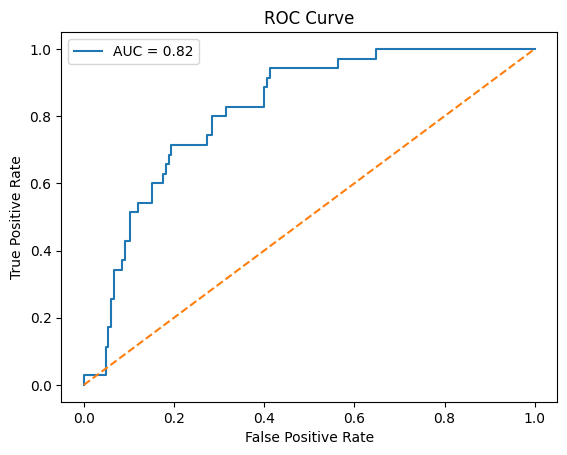

In [66]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, roc_auc_score, roc_curve,
    classification_report, confusion_matrix
)
import matplotlib.pyplot as plt

data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/students (3).csv")

X = data.drop("dropped_out", axis=1)
y = data["dropped_out"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=4, stratify=y
)

smote = SMOTE(sampling_strategy="auto",random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f"Baseline Accuracy (always predict majority class): {baseline_accuracy:.2%}")
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_pred_proba):.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [67]:
print(y_train.value_counts())  # Should be roughly balanced

dropped_out
0    661
1    139
Name: count, dtype: int64


In [68]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
import matplotlib.pyplot as plt

X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1,
                           n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

print("Before SMOTE:", Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("After SMOTE:", Counter(y_res))

Before SMOTE: Counter({np.int64(0): 897, np.int64(1): 103})
After SMOTE: Counter({np.int64(0): 897, np.int64(1): 897})


In [69]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
features = ['mark1', 'mark2','mark3','attendance','fee_paid_flag','edu_loan_flag','yearly_income','yearly_fees']
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [70]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_depth=3
)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test_scaled)
y_prob_rf=rf.predict_proba(X_test_scaled)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf)}")

Accuracy: 0.947075208913649
ROC AUC: 0.9786670819059484


In [71]:
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f"Baseline Accuracy (always predict majority class): {baseline_accuracy:.2%}")

Baseline Accuracy (always predict majority class): 52.92%


In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter

X, y = make_classification(n_classes=2, class_sep=2,
                           weights=[0.9, 0.1],
                           n_informative=3, n_redundant=1,
                           n_features=5, n_clusters_per_class=1,
                           n_samples=1000, random_state=42)

print("Before SMOTE:", Counter(y))

n_majority = Counter(y)[0]
n_minority_desired = int(0.25 / 0.75 * n_majority)

sm = SMOTE(sampling_strategy={1: n_minority_desired}, random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("After SMOTE:", Counter(y_res))

Before SMOTE: Counter({np.int64(0): 897, np.int64(1): 103})
After SMOTE: Counter({np.int64(0): 897, np.int64(1): 299})


In [73]:
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
features = ['mark1', 'mark2','mark3','attendance','fee_paid_flag','edu_loan_flag','yearly_income','yearly_fees']
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200,max_depth=3
)
rf.fit(X_train, y_train)
y_pred_rf=rf.predict(X_test_scaled)
y_prob_rf=rf.predict_proba(X_test_scaled)[:,1]

print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob_rf)}")

Accuracy: 0.9958333333333333
ROC AUC: 1.0


In [75]:
baseline_accuracy = max(y_test.mean(), 1 - y_test.mean())
print(f"Baseline Accuracy (always predict majority class): {baseline_accuracy:.2%}")

Baseline Accuracy (always predict majority class): 77.92%
